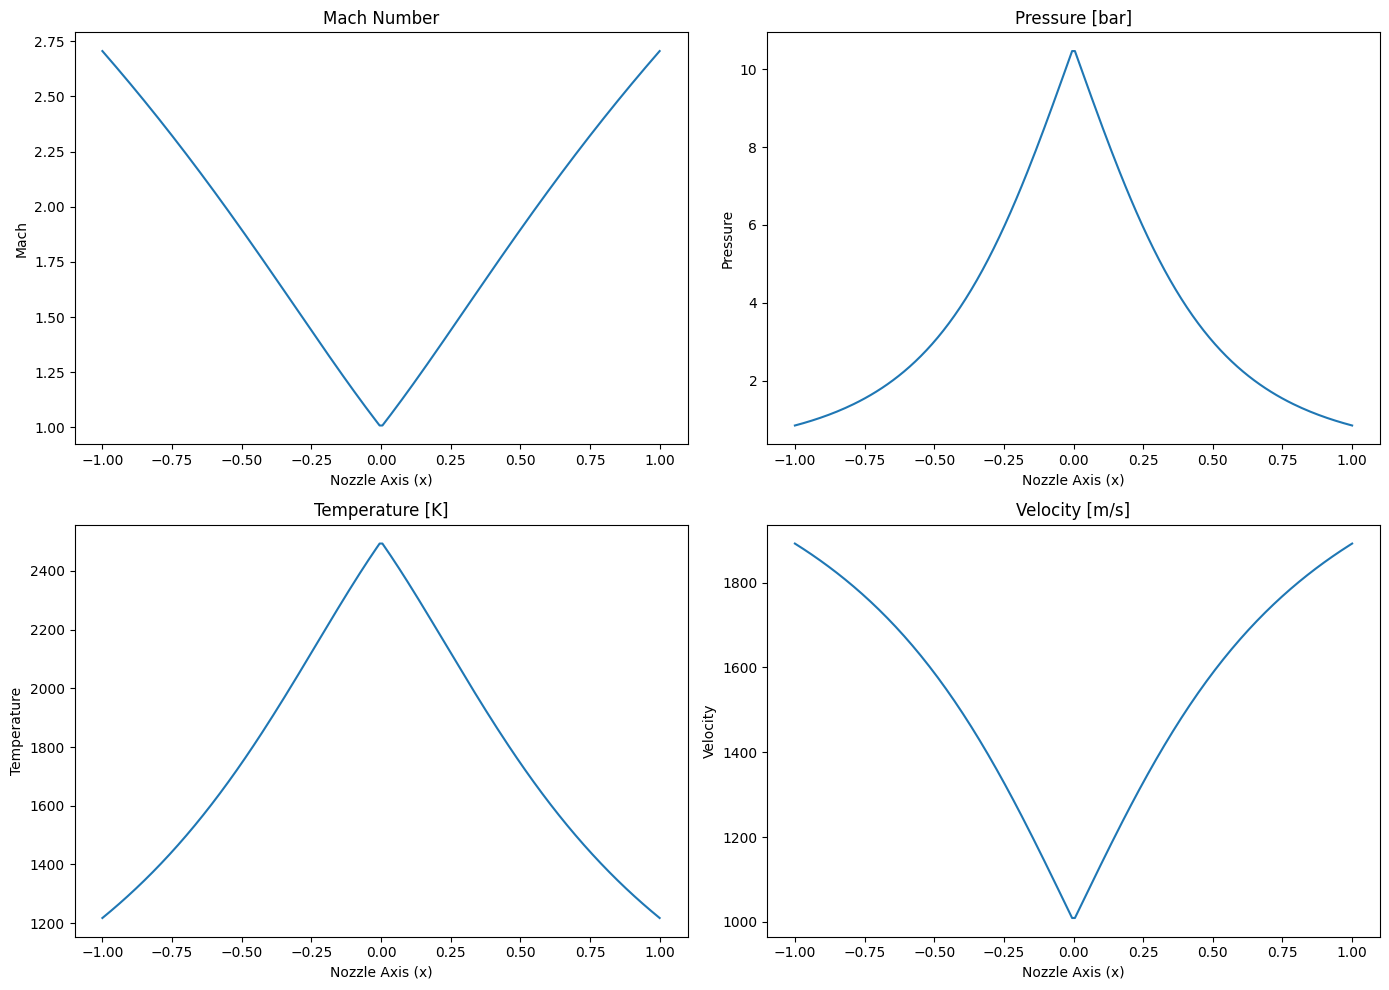

In [ ]:
# 🚀 Rocket Nozzle Simulation in Python (Isentropic Flow)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Gas and chamber parameters
gamma = 1.4          # Specific heat ratio (air)
R = 287.0            # J/(kg·K), gas constant
P0 = 2e6             # Chamber pressure [Pa]
T0 = 3000            # Chamber temperature [K]
At = 0.01            # Throat area [m^2]

# Parabolic nozzle shape (symmetric)
x = np.linspace(-1, 1, 200)
A = At * (1 + 2.2 * x**2)   # Converging-diverging shape

# Area-Mach relation (isentropic)
def area_mach_relation(M, gamma):
    return (1/M) * ((2/(gamma+1))*(1 + ((gamma-1)/2)*M**2))**((gamma+1)/(2*(gamma-1)))

# Find Mach number from area ratio
def mach_from_area(area_ratio, supersonic=True):
    guess = 2.0 if supersonic else 0.2
    func = lambda M: area_mach_relation(M, gamma) - area_ratio
    M_solution, = fsolve(func, guess)
    return M_solution

# Compute flow properties
M_vals, T_vals, P_vals, v_vals = [], [], [], []

for Ai in A:
    area_ratio = Ai / At
    M = mach_from_area(area_ratio, supersonic=(Ai > At))
    T = T0 / (1 + (gamma - 1)/2 * M**2)
    P = P0 / (1 + (gamma - 1)/2 * M**2)**(gamma/(gamma - 1))
    v = M * np.sqrt(gamma * R * T)

    M_vals.append(M)
    T_vals.append(T)
    P_vals.append(P)
    v_vals.append(v)

# Plot results
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(x, M_vals)
plt.title("Mach Number")
plt.xlabel("Nozzle Axis (x)")
plt.ylabel("Mach")

plt.subplot(2, 2, 2)
plt.plot(x, np.array(P_vals)/1e5)
plt.title("Pressure [bar]")
plt.xlabel("Nozzle Axis (x)")
plt.ylabel("Pressure")

plt.subplot(2, 2, 3)
plt.plot(x, T_vals)
plt.title("Temperature [K]")
plt.xlabel("Nozzle Axis (x)")
plt.ylabel("Temperature")

plt.subplot(2, 2, 4)
plt.plot(x, v_vals)
plt.title("Velocity [m/s]")
plt.xlabel("Nozzle Axis (x)")
plt.ylabel("Velocity")

plt.tight_layout()
plt.show()